In [5]:
!jt -t chesterish -T -N

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("jigsaw-toxic-comment-classification-challenge/train.csv",encoding='latin-1')
print(df.shape)

(159571, 8)


In [4]:
print(df.head())

                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0  


In [5]:
# To split only into text and result
#For the text
comment = df['comment_text']
print(comment.head())

0    Explanation\nWhy the edits made under my usern...
1    D'aww! He matches this background colour I'm s...
2    Hey man, I'm really not trying to edit war. It...
3    "\nMore\nI can't make any real suggestions on ...
4    You, sir, are my hero. Any chance you remember...
Name: comment_text, dtype: object


In [6]:
#For the other labels
label = df[['toxic', 'severe_toxic' , 'obscene' , 'threat' , 'insult' , 'identity_hate']]
print(label.head())

   toxic  severe_toxic  obscene  threat  insult  identity_hate
0      0             0        0       0       0              0
1      0             0        0       0       0              0
2      0             0        0       0       0              0
3      0             0        0       0       0              0
4      0             0        0       0       0              0


# Data Visualization

average length of row: 394.712


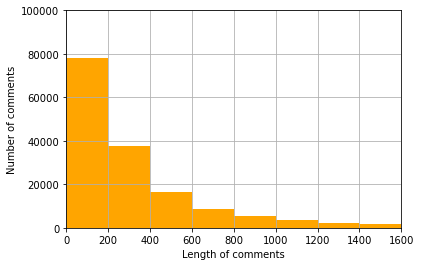

In [7]:
#For data visualization to see the average words in each row

x = [len(comment[i]) for i in range(comment.shape[0])]
print('average length of row: {:.3f}'.format(sum(x)/len(x)))
ranges = [0,200,400,600,800,1000,1200,1400,1600]
plt.hist(x, bins = ranges, color=['orange'])
plt.xlabel('Length of comments')
plt.ylabel('Number of comments')    
plt.axis([0, 1600, 0, 100000])
plt.grid(True)
plt.show()


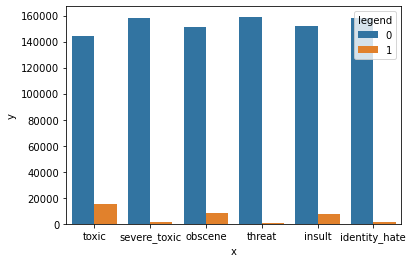

In [8]:
#To find the number of comments in each label

toxic_count = df['toxic'].value_counts()
severe_toxic_count = df['severe_toxic'].value_counts()
obscene_count = df['obscene'].value_counts()
threat_count = df['threat'].value_counts()
insult_count = df['insult'].value_counts()
identity_hate_count = df['identity_hate'].value_counts()

df0=pd.DataFrame({'x':['toxic','severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'],'y':[toxic_count[0], severe_toxic_count[0], obscene_count[0], threat_count[0], insult_count[0], identity_hate_count[0]]})
df1=pd.DataFrame({'x':['toxic','severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'],'y':[toxic_count[1], severe_toxic_count[1], obscene_count[1], threat_count[1], insult_count[1], identity_hate_count[1]]})

df0['legend']=0
df1['legend']=1
df_final=pd.concat([df0,df1])
sns.barplot(x='x',y='y', data=df_final, hue='legend')
plt.show()

# Splitting training data and preprocessing using tfidf vectorizer.

In [9]:

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=0.00009, smooth_idf=True, norm="l2", tokenizer = lambda x: x.split(" "), sublinear_tf=False, ngram_range=(1,2), stop_words='english')
comment = vectorizer.fit_transform(comment)

# X : comment, y : label
X_train, X_test, y_train, y_test = train_test_split(comment, label, test_size=0.1)

print("Dimensions of train data X:",X_train.shape, "Y :",y_train.shape)
print("Dimensions of test data X:",X_test.shape,"Y:",y_test.shape)


print(X_train)
print(y_train)

Dimensions of train data X: (143613, 42136) Y : (143613, 6)
Dimensions of test data X: (15958, 42136) Y: (15958, 6)
  (0, 41275)	0.4061851542546547
  (0, 21216)	0.37193290256581407
  (0, 10644)	0.39408487310244744
  (0, 39812)	0.31594236830208433
  (0, 27470)	0.3059372185848421
  (0, 6953)	0.2824509513350389
  (0, 10638)	0.19201767971739
  (0, 39839)	0.2197307893419784
  (0, 10340)	0.24256450360030848
  (0, 19843)	0.16933463961240602
  (0, 6600)	0.11652180216111821
  (0, 3509)	0.1376782941749398
  (0, 36088)	0.17307512300631156
  (0, 27438)	0.12577383172629958
  (0, 36061)	0.13118720145312662
  (1, 26651)	0.15898762740759137
  (1, 37544)	0.15233039635293935
  (1, 149)	0.15494786312032816
  (1, 4851)	0.14859488200077797
  (1, 20965)	0.1420844284066656
  (1, 39055)	0.15644121917166137
  (1, 26522)	0.15116924453374225
  (1, 11975)	0.2647220011854844
  (1, 26648)	0.13045947264919625
  (1, 23515)	0.14859488200077797
  :	:
  (143606, 17620)	0.38306493482077986
  (143606, 10585)	0.35349179559

# Evaluation Metrics

In [10]:
from sklearn.metrics import hamming_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

def evaluate_metrics(y_test, y_pred): 
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy     : ", accuracy*100)
    
    hammingLoss = hamming_loss(y_test, y_pred)
    print("Hamming_loss : ", hammingLoss*100)
    
    logLoss = log_loss(y_test, y_pred)
    print("Log_loss     : ", logLoss)

# Building the model with : OneVsRestClassifier and Logistic Regression.

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

classifier_OVR = OneVsRestClassifier(LogisticRegression(penalty='l2', class_weight='balanced', verbose=1), n_jobs=-1)
classifier_OVR.fit(X_train, y_train)
predictions = classifier_OVR.predict(X_test)

In [12]:
score = classifier_OVR.score(X_test, y_test)
evaluate_metrics(y_test, predictions)

Accuracy     :  85.69369595187368
Hamming_loss :  3.8768433805405857
Log_loss     :  0.756322450265294


In [13]:
sentence = 'I hate that you love me'
sentence1 = 'I like how you are bad'
sentence3 = 'YOu fucking piece of shit. I will kill you'
y_pred = classifier_OVR.predict(vectorizer.transform([sentence3]))
print(label.head(1))
print(y_pred)


   toxic  severe_toxic  obscene  threat  insult  identity_hate
0      0             0        0       0       0              0
[[1 1 1 1 1 1]]


In [14]:
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats

alpha = [0.000001,0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
parameters  = {"estimator__C":alpha, "estimator__penalty":['l2']}

base_estimator_one = OneVsRestClassifier(LogisticRegression(class_weight='balanced'), n_jobs=-1)
randomized_search = RandomizedSearchCV(estimator=base_estimator_one, param_distributions=parameters, n_iter=10, cv=5, scoring='f1_micro', n_jobs=-1, verbose=0)
randomized_search.fit(X_train, y_train)
print("Best estimator:              ",randomized_search.best_estimator_)
print("Best Cross Validation Score: ",randomized_search.best_score_)


Best estimator:               OneVsRestClassifier(estimator=LogisticRegression(C=10, class_weight='balanced'),
                    n_jobs=-1)
Best Cross Validation Score:  0.6243943378773815


In [15]:
classifier_OVR_best = randomized_search.best_estimator_
classifier_OVR_best.fit(X_train, y_train)
pred_OVR_best = classifier_OVR_best.predict(X_test)
evaluate_metrics(y_test, pred_OVR_best)

Accuracy     :  86.0508835693696
Hamming_loss :  3.4987675982788153
Log_loss     :  0.9995785618609669


# Building the model with : K-Nearest Neighbor.

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

k_range = range(1,41)

#Tuning k using gridsearch, or in other words, finding the best possible k value
k_array = []
for i in k_range:
    k_array.append(i)

grid_params = {'n_neighbors':k_array}
gs = GridSearchCV(KNeighborsClassifier(),grid_params)
gs_results = gs.fit(X_train,y_train)

k_val = gs_results.best_score_
# print("Best score",gs_results.best_score_)
print("Best estimator:              ",gs_results.best_estimator_)
print("Best Cross Validation Score: ",gs_results.best_score_)

Best estimator:               KNeighborsClassifier(n_neighbors=1)
Best Cross Validation Score:  0.8927673704921995


In [12]:
classifier_KNN_best = gs_results.best_estimator_ #This is the best possible k value obtained
classifier_KNN_best.fit(X_train, y_train)

pred_KNN_best = classifier_KNN_best.predict(X_test)
evaluate_metrics(y_test, pred_KNN_best)

Accuracy     :  88.65146008271714
Hamming_loss :  3.6146969127292476
Log_loss     :  0.916218902233894


# Building the model with 